In [1]:
from fastai.vision import *

In [2]:
path = Path('../input/dataset1/dataset1')
path.ls()

[PosixPath('../input/dataset1/dataset1/train'),
 PosixPath('../input/dataset1/dataset1/test'),
 PosixPath('../input/dataset1/dataset1/valid')]

In [3]:
classes = ['man', 'woman']

In [4]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

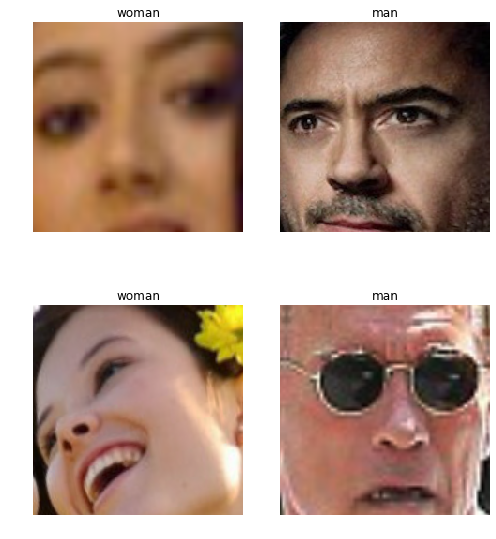

In [5]:
data.show_batch(rows=2, figsize=(7,8))

In [6]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['man', 'woman'], 2, 1824, 456)

In [7]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate, model_dir='/tmp/.torch/models/')

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /tmp/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 44.7MB/s]


In [8]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.702958,0.345810,0.111842,00:23
1,0.565185,0.285720,0.087719,00:22
2,0.446428,0.215862,0.083333,00:21
3,0.375374,0.204152,0.074561,00:21


In [9]:
learn.save('stage-1')

In [10]:
learn.unfreeze()

In [11]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


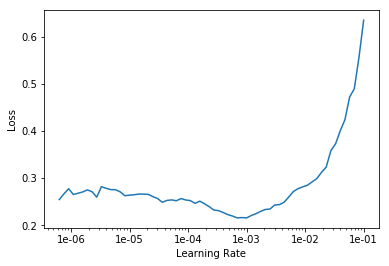

In [12]:
learn.recorder.plot()

In [13]:
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-5))

epoch,train_loss,valid_loss,error_rate,time
0,0.271542,0.199239,0.070175,00:22
1,0.248135,0.193088,0.072368,00:22


In [14]:
learn.save('stage-2')

**INTERPRETATION**

In [15]:
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (1824 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
man,man,man,man,man
Path: ../input/dataset1/dataset1;

Valid: LabelList (456 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
man,woman,woman,man,woman
Path: ../input/dataset1/dataset1;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine

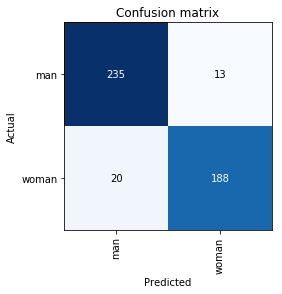

In [16]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

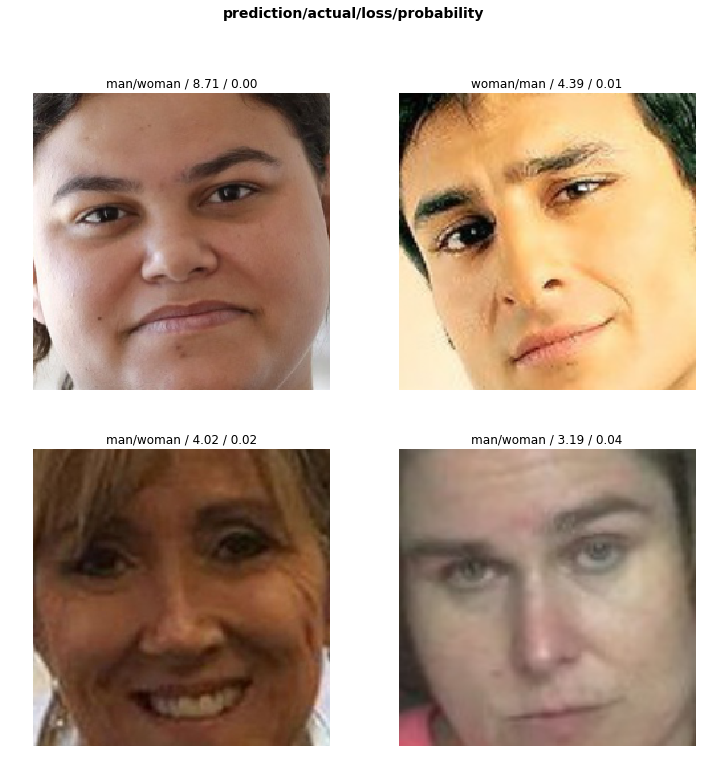

In [17]:
interp.plot_top_losses(k = 4, heatmap=False)

In [18]:
from fastai.widgets import *

In [19]:
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [20]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate, model_dir='/tmp/.torch/models/')

learn_cln.load('stage-2');

In [21]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [22]:
ImageCleaner(ds, idxs, Path('/tmp'))

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [23]:
ds, idxs = DatasetFormatter().from_similars(learn_cln)

Getting activations...


Computing similarities...


In [24]:
ImageCleaner(ds, idxs, Path('/tmp'), duplicates=True)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [25]:
db = (ImageList.from_csv(Path('/tmp'), 'cleaned.csv', folder='')
                   .split_none()
                   .label_from_df()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [26]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate, model_dir='/tmp/.torch/models/')

learn_cln.load('stage-2');

In [27]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.224081,0.399531,0.140351,00:23
1,0.190050,0.129109,0.046053,00:23
2,0.123485,0.051050,0.024123,00:23
3,0.085551,0.044708,0.019737,00:22


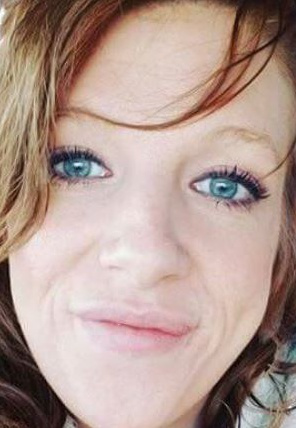

In [28]:
img = open_image(path/'test'/'woman'/'face_130.jpg')
img

In [29]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category woman

In [30]:
learn.save("trained_model", return_path=True)

PosixPath('/tmp/.torch/models/trained_model.pth')

In [31]:
learn.export('/kaggle/working/trained_model.pkl')

In [32]:
path = '/kaggle/working/'
path

'/kaggle/working/'

In [33]:
learn = load_learner(path, 'trained_model.pkl')

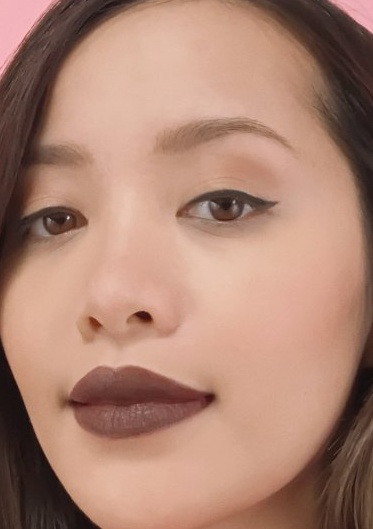

In [34]:
path = Path('../input/dataset1/dataset1')
path.ls()
img = open_image(path/'test'/'woman'/'face_132.jpg')
img

In [35]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category woman